### 2 лабораторнач работа
#### _From Rasul, Nail and Alsu with Love_

In [17]:
import numpy as np
import sympy as sp
import math
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd

##### 1 задание

Создать квадратную матрицу из случайных вещественных чисел размера 10 . Найти скалярное произведение 2 строки на 7 столбец. использовать срезы матриц.

In [18]:
matrix = np.random.randint(0, 10, size=(10, 10))
second_row = matrix[1, :] 
seventh_column = matrix[:, 6] 

dot_product = np.dot(second_row, seventh_column)
print(dot_product)

162


#### 2 задание

Создать вектор-строку 1x10 из случайных целых чисел. Вычислить норму $$ ||x||_4 $$ самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в Python.

In [19]:
vector = np.random.randint(0, 101, 10)

def norm_p(x, p):
    return np.sum(np.abs(x)**p)**(1/p)

# Вычисление нормы ||x||4 с помощью написанной функции
custom_norm_value = norm_p(vector, 4)

# Вычисление нормы ||x||4 с помощью linalg.norm()
linalg_norm_value = np.linalg.norm(vector, 4)

print(vector)
print(custom_norm_value)
print(linalg_norm_value)

[78 35 61  0 77 71 87 30 55 79]
121.66728868441315
121.66728868441315


#### 3 задание

Создать матрицу из случайных целых чисел. Найти норму матрицы $$ ||A||_∞ $$ с помощью самостоятельно написанного
алгоритма, проверить результат с помощью linalg.norm() в Python.

In [20]:
# Создаем матрицу 5x5 из случайных целых чисел в диапазоне от 0 до 50
matrix = np.random.randint(0, 51, (5, 5))

# Функция для вычисления бесконечной нормы матрицы 
def infinity_norm(matrix):
    return np.max(np.sum(np.abs(matrix), axis=1))

# Вычисление бесконечной нормы матрицы с помощью написанной функции
custom_infinity_norm = infinity_norm(matrix)

# Вычисление бесконечной нормы матрицы с помощью linalg.norm()
linalg_infinity_norm = np.linalg.norm(matrix, np.inf)

print(matrix)
print(custom_infinity_norm)
print(linalg_infinity_norm)

[[22 41 38 20 27]
 [42 34  0 37 45]
 [27  3 16 15  4]
 [22  7 40 48 38]
 [33 15  0 39  6]]
158
158.0


#### 4 задание

Найти псевдорешение системы 
3.3x1 + 2.1x2 + 2.8x3 = 0.8
4.1x1 + 3.7x2 + 4.8x3 = 5.7
2.7x1 + 1.8x2 + 1.1x3 = 3.2
3.15x1 - 1.72x2 - 1.23x3 = 2.15

In [26]:
# Коэффициенты при переменных в левой части уравнений
A = np.array([
    [3.3, 2.1, 2.8],
    [4.1, 3.7, 4.8],
    [2.7, 1.8, 1.1],
    [3.15, -1.72, -1.23]
])

# Значения в правой части уравнений
b = np.array([0.8, 5.7, 3.2, 2.15])

#Псевдорешение
A_transponsed = A.transpose()
matr_inv = np.linalg.inv(np.matmul(A_transponsed, A))
x = np.matmul(np.matmul(matr_inv, A_transponsed), b)
x

array([ 0.79147895,  0.66140852, -0.2988653 ])

#### 5 задание

Даны пять точек (-4; 7), (-2; 1), (0; -3), (4, -8), (6, -9). Найти уравнение наиболее выгодной траектории. Построить график.


[[-1.54651163]
 [-1.1627907 ]]


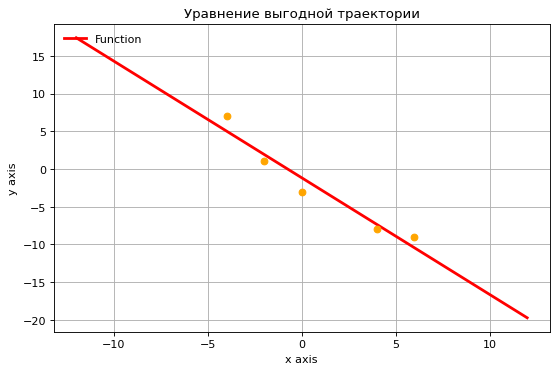

In [28]:
matr = np.array([[-4, 1],
                 [-2, 1],
                 [0, 1],
                 [4, 1],
                 [6, 1]], np.int64)
vecB = np.array([[7],
                 [1],
                 [-3],
                 [-8],
                 [-9]], np.int64)
matr_transponsed = matr.transpose()
matr_1 = np.dot(matr_transponsed, matr)
matr_inv = np.linalg.inv(matr_1)
matr_2 = np.dot(matr_inv, matr_transponsed)
x = np.dot(matr_2, vecB)
print(x) # x = [a, b]

fig = plt.figure(figsize=(8, 5), dpi=80);
"""
ax = plt.subplot(111);
ax.spines['right'].set_color('none');
ax.spines['top'].set_color('none');
ax.xaxis.set_ticks_position('bottom');
ax.spines['bottom'].set_position(('data', 0));
ax.yaxis.set_ticks_position('left');
ax.spines['left'].set_position(('data', 0));
"""
X = np.linspace(-12, 12, 256, endpoint=True);
F = x[0] * X + x[1];
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function");
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Уравнение выгодной траектории')
plt.plot(-4, 7, color="orange", marker="o")
plt.plot(-2, 1, color="orange", marker="o")
plt.plot(0, -3, color="orange", marker="o")
plt.plot(4, -8, color="orange", marker="o")
plt.plot(6, -9, color="orange", marker="o")
plt.legend(loc='upper left', frameon=False);
plt.grid();
plt.show();

#### 6 задание

Решить систему, используя LU разложение матрицы. LU разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран. Придерживаться плана решения, приведенного в пособии!

In [32]:
def LU_decomposition(matrA):
    n = len(matrA[0])
    matrU = np.zeros((n, n), float)
    matrL = np.identity(n, float)
    for i in range(n):
        for j in range(n):
            if i <= j:
                matrU[i, j] = matrA[i, j] - np.dot(matrL[i, :i], matrU[:i, j])
            else:
                matrL[i, j] = (matrA[i, j] - np.dot(matrL[i, :j], matrU[:j, j])) / matrU[j, i]
    return matrL, matrU

def search_vecY(matrL, vecB):
    n = len(vecB)
    vecY = np.zeros(n, float)
    vecY[0] = vecB[0]
    for i in range(1, n):
        resS = vecB[i]
        for j in range(i):
            resS = resS - matrL[i][j] * vecY[j]
        vecY[i] = resS
    return vecY

def search_vecX(matrU, vecY):
    n = len(vecY)
    vecX = np.zeros(n, float)
    vecX[n-1] = vecY[n-1] / matrU[n-1][n-1]
    for i in range(n-1, -1, -1):
        resS = vecY[i]
        for j in range(n - 1, i, -1):
            resS = resS - matrU[i][j] * vecX[j]
        vecX[i] = resS / matrU[i][i]
    return vecX

# Коэффициенты и правая часть системы
matrA = np.array([
    [3.8, 14.2, 6.3, -15.5],
    [8.3, -6.6, 5.8, 12.2],
    [6.3, -8.5, -4.3, 8.8],
    [17.1, -8.3, 14.4, -7.2]
])
vecB = np.array([[2.8],
                 [-4.7],
                 [7.7],
                 [13.5]])

matrL, matrU = LU_decomposition(matrA)
vecY = search_vecY(matrL, vecB)
vecX = search_vecX(matrU, vecY)

print(np.linalg.solve(matrA, vecB))

[[  1.           0.           0.           0.        ]
 [  0.58450704   1.           0.           0.        ]
 [  1.         -10.71965414   1.           0.        ]
 [ -1.10322581   0.34646544   0.08174775   1.        ]]
[[ 0.98142231]
 [-0.58799902]
 [-1.01184977]
 [-0.88998935]]


C:\Users\rasul\AppData\Local\Temp\ipykernel_21012\3980539863.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vecY[0] = vecB[0]
C:\Users\rasul\AppData\Local\Temp\ipykernel_21012\3980539863.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vecY[i] = resS


#### 7 Задание
Решить систему из пункта 6 с помощью QR разложения матрицы А. QR разложение найти методом Хаусхолдера. Придерживаться плана решения, приведенного в пособии! Проверить полученное решение непосредственной подстановкой в исходную систему, а также методом np.solve

In [33]:
def householder_reflection(A):
    """
    Производит QR разложение матрицы A с помощью преобразований Хаусхолдера.
    Возвращает матрицы Q и R.
    """
    (r, c) = np.shape(A)
    Q = np.identity(r)
    R = np.copy(A)
    for cnt in range(r - 1):
        x = R[cnt:, cnt]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        u = x - e
        v = u / np.linalg.norm(u)
        Q_cnt = np.identity(r)
        Q_cnt[cnt:, cnt:] -= 2.0 * np.outer(v, v)
        R = np.dot(Q_cnt, R)
        Q = np.dot(Q, Q_cnt)
    return (Q, R)

def mult_Q_transpose(matrQ, vecB):
    #vecY = np.zeros(len(vecB), float)
    matr_Q_transponse = np.transpose(matrQ)
    return np.matmul(matr_Q_transponse, vecB)

matrA = matrA
vecB = vecB
matrQ, matrR = householder_reflection(matrA)
print(f"matrix A: {matrA}\n")
print(f"QR: {np.matmul(matrQ, matrR)}")

vecY = mult_Q_transpose(matrQ, vecB)
vecX = search_vecX(matrR, vecY)
print(np.reshape(vecX, (4, 1)))
print(np.linalg.solve(matrA, vecB))

matrix A: [[  3.8  14.2   6.3 -15.5]
 [  8.3  -6.6   5.8  12.2]
 [  6.3  -8.5  -4.3   8.8]
 [ 17.1  -8.3  14.4  -7.2]]

QR: [[  3.8  14.2   6.3 -15.5]
 [  8.3  -6.6   5.8  12.2]
 [  6.3  -8.5  -4.3   8.8]
 [ 17.1  -8.3  14.4  -7.2]]
[[ 0.98142231]
 [-0.58799902]
 [-1.01184977]
 [-0.88998935]]
[[ 0.98142231]
 [-0.58799902]
 [-1.01184977]
 [-0.88998935]]


C:\Users\rasul\AppData\Local\Temp\ipykernel_21012\3980539863.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vecX[n-1] = vecY[n-1] / matrU[n-1][n-1]
C:\Users\rasul\AppData\Local\Temp\ipykernel_21012\3980539863.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vecX[i] = resS / matrU[i][i]


#### 8 Задание
Методом Зейделя

In [36]:
def task_8_complete(x, new_x):
    vec = new_x - x
    return np.linalg.norm(vec, ord=np.inf) < 0.001


matrix_a = np.array([[7.3, 2.1, 2.8],
                [4.1, 8.7, 4.8],
                [2.7, 1.8, 9.1]])
matrix_b = np.array([0.8, 5.7, 3.2])

x = [0 for k in range(0, len(matrix_b))]
iter_amount = 0
MAX_ITER = 100
matrix_a_new = np.zeros((len(matrix_b), len(matrix_b)), dtype=np.float64)
matrix_b_new = np.zeros(len(matrix_b), dtype=np.float64)
for i in range(0, len(matrix_b)):
    for j in range(0, len(matrix_b)):
        if i != j:
            matrix_a_new[i][j] = -matrix_a[i][j] / matrix_a[i][i]
    matrix_b_new[i] = matrix_b[i] / matrix_a[i][i]
table = [[]]
table[0] = x
while iter_amount < MAX_ITER:
    x_prev = x
    matr1 = np.matmul(matrix_a_new, x)
    x_new = matr1 + matrix_b_new
    table.append(x_new)
    x = x_new
    if task_8_complete(x_prev, x):
        break
    iter_amount += 1
dt = pd.DataFrame(table, columns=['X1', 'X2', 'X3'])
print(dt)
print(f"Result: \n{x}")
print("Решение методом np.linalg.solve:\n", np.linalg.solve(matrix_a, matrix_b))

          X1        X2        X3
0   0.000000  0.000000  0.000000
1   0.109589  0.655172  0.351648
2  -0.213764  0.409514  0.189538
3  -0.080916  0.651339  0.334070
4  -0.205919  0.508991  0.246820
5  -0.131504  0.616038  0.312066
6  -0.187324  0.544971  0.268812
7  -0.150290  0.595141  0.299431
8  -0.176466  0.560795  0.278520
9  -0.158565  0.584669  0.293080
10 -0.171018  0.568199  0.283046
11 -0.162431  0.579603  0.289999
12 -0.168379  0.571721  0.285195
13 -0.164269  0.577174  0.288519
14 -0.167112  0.573403  0.286221
15 -0.165146  0.576011  0.287811
16 -0.166506  0.574208  0.286711
17 -0.165566  0.575455  0.287472
18 -0.166216  0.574592  0.286946
Result: 
[-0.16621595  0.57459249  0.2869459 ]
Решение методом np.linalg.solve:
 [-0.16595004  0.57494518  0.28716085]
